In [1]:
import pandas as pd

In [67]:
data12=pd.read_csv("C:/Users/guswn/OneDrive/바탕 화면/생활인구/02_nabis_공모전_신용카드_226개 시군구 소비매출/시군구_매출집계데이터_202212.csv",encoding="utf-8")
defi=pd.read_excel("C:/Users/guswn/OneDrive/바탕 화면/생활인구/별첨_전국_누적_행정동코드_정의서_KT_20230502.xlsx")

c:\Users\guswn\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [68]:
data12=data12.rename(columns={"dsbc_sigun_final_202212.시군구코드":"sgg_cd"})

In [69]:
data12=data12.rename(columns={"dsbc_sigun_final_202212.기준년월":"기준년월","dsbc_sigun_final_202212.시군구명":"시군구명","dsbc_sigun_final_202212.bc대분류명":"대분류명","dsbc_sigun_final_202212.추정매출금액":"추정매출금액","dsbc_sigun_final_202212.추정매출건수":"추정매출건수"})

In [70]:
#화순군 46790, 계룡시 44250 #문경시 47280, #홍천군42720 부여군 44760
list=[46790,44250,47280,42720,44760]
new12=data12[data12["sgg_cd"].isin(list)]

In [71]:
new12['대분류명'].value_counts()

T&E    5
기타     5
내구재    5
문화     5
생활     5
쇼핑     5
유흥     5
음식     5
Name: 대분류명, dtype: int64

In [72]:
new=pd.concat([new01,new02,new03,new04,new05,new06,new07,new08,new09,new10,new11,new12])

In [76]:
new.to_csv('C:/Users/guswn/OneDrive/바탕 화면/생활인구/주거지역 카드 데이터.csv',encoding='cp949',index=False)

In [77]:
new=pd.read_csv('C:/Users/guswn/OneDrive/바탕 화면/생활인구/주거지역 카드 데이터.csv',encoding='cp949')

In [78]:
new

,기준년월,sgg_cd,시군구명,대분류명,추정매출금액,추정매출건수
0,202201,42720,홍천군,T&E,21218719673,494377
1,202201,42720,홍천군,기타,194052366,33119
2,202201,42720,홍천군,내구재,3267036155,69615
3,202201,42720,홍천군,문화,1540425062,38461
4,202201,42720,홍천군,생활,42235115134,1687000
...,...,...,...,...,...,...
475,202212,47280,문경시,문화,1683719667,53136
476,202212,47280,문경시,생활,31755454093,1063101
477,202212,47280,문경시,쇼핑,4952718029,79690
478,202212,47280,문경시,유흥,2195853567,133550


In [79]:
df_grouped = new.groupby([ 'sgg_cd', '시군구명', '대분류명']).sum().reset_index()

In [82]:
df=df_grouped.drop(["sgg_cd","기준년월"],axis=1)

In [83]:
df

,시군구명,대분류명,추정매출금액,추정매출건수
0,홍천군,T&E,252165894554,3947981
1,홍천군,기타,2385493097,513946
2,홍천군,내구재,49899307652,957606
3,홍천군,문화,17645187672,442054
4,홍천군,생활,503013420555,18829598
5,홍천군,쇼핑,25648546696,556011
6,홍천군,유흥,31676873609,1502680
7,홍천군,음식,134508111640,3175977
8,계룡시,T&E,10009259750,263790
9,계룡시,기타,580469840,10847


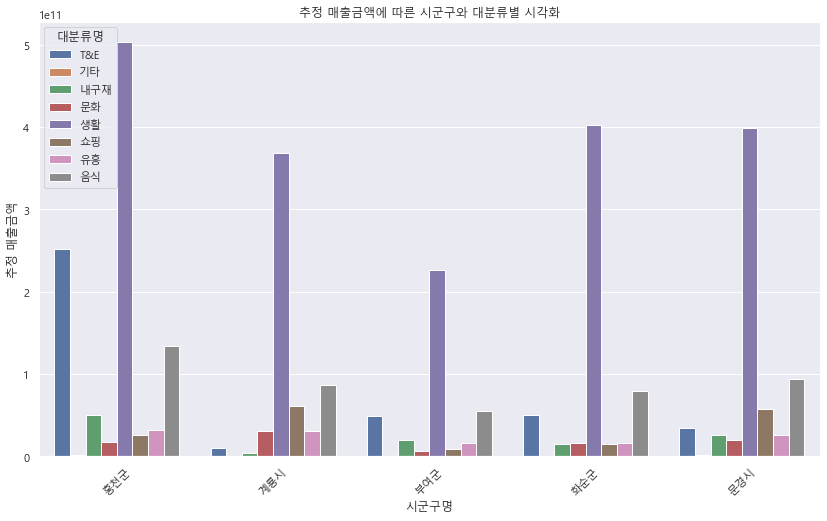

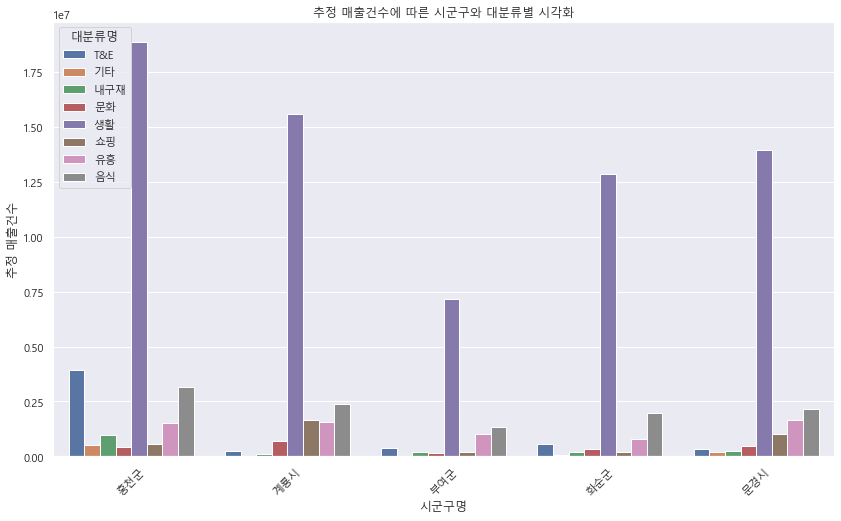

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')
# 데이터를 데이터프레임으로 변환합니다. (주어진 데이터를 변수 df에 저장한다고 가정합니다.)
# 위의 데이터를 사용하여 데이터프레임을 생성합니다.

# 시군구와 대분류별 추정 매출금액을 시각화합니다.
plt.figure(figsize=(14, 8))
sns.barplot(x="시군구명", y="추정매출금액", hue="대분류명", data=df, ci=None)
plt.title("추정 매출금액에 따른 시군구와 대분류별 시각화")
plt.xlabel("시군구명")
plt.ylabel("추정 매출금액")
plt.xticks(rotation=45)
plt.show()

# 시군구와 대분류별 추정 매출건수를 시각화합니다.
plt.figure(figsize=(14, 8))
sns.barplot(x="시군구명", y="추정매출건수", hue="대분류명", data=df, ci=None)
plt.title("추정 매출건수에 따른 시군구와 대분류별 시각화")
plt.xlabel("시군구명")
plt.ylabel("추정 매출건수")
plt.xticks(rotation=45)
plt.show()